In [109]:
import numpy as np
import matplotlib.pyplot as plt
import cubic_potentials as cp

In [110]:
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/radon/comsol/po216_loading/"

In [111]:
sep_list = [500, 1000, 1500, 2000]

for sep in sep_list:

    dat = np.loadtxt(path + "field_map_2D_%dum.txt"%sep, skiprows=9)

    V = 1.0 ## volts
    xvals = dat[:,0].reshape((1601, 1601)) #cm
    yvals = dat[:,1].reshape((1601, 1601)) #cm
    Ex = V/1000*dat[:,2].reshape((1601, 1601))/100 #V/cm @ 1000 V bias
    Ey = V/1000*dat[:,3].reshape((1601, 1601))/100 #V/cm @ 1000 V bias

    Exs, Eys, _ = cp.Esphere(xvals,yvals,0,-1000,1.5e-4)

    #if(False):
    #    Ex += Exs
    #    Ey += Eys
    #
    #Enorm = np.sqrt(Ex**2 + Ey**2)

    np.savez("efield_needle_2d_%dum.npz"%sep,x=xvals, y=yvals, Ex=Ex, Ey=Ey)

/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/Paul_Trap_MC/cubic_potentials.py:328: RuntimeWarning: divide by zero encountered in true_divide
  Esphere = k * q_sphere/r**2
/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/Paul_Trap_MC/cubic_potentials.py:330: RuntimeWarning: invalid value encountered in true_divide
  Es_x, Es_y, Es_z = Esphere*x/r, Esphere*y/r, Esphere*z/r


In [116]:
Exs, Eys, _ = cp.Esphere(xvals,yvals,0,-100,1.5e-4)

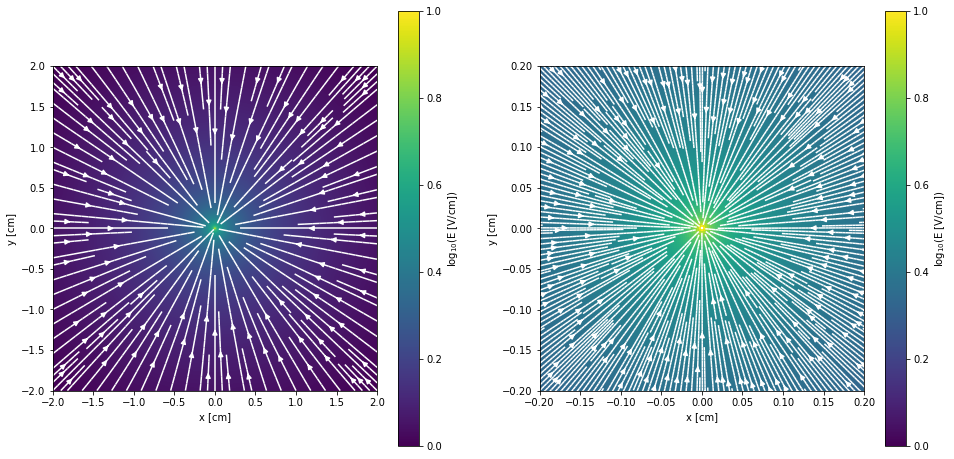

In [128]:
sep = 2000
V = 0

dat = np.load("efield_needle_2d_%dum.npz"%sep)
xvals, yvals = dat['x'], dat['y']
Ex, Ey = V*dat['Ex'], V*dat['Ey']

Ex += Exs
Ey += Eys

Enorm = np.sqrt(Ex**2 + Ey**2)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pcolormesh(xvals, yvals, np.log10(Enorm)) #, vmin=0.1, vmax=1)
plt.streamplot(xvals, yvals, Ex, Ey, color='white', density=1.5)
ax = plt.gca()
ax.set_aspect(1)
plt.colorbar(label=r'log$_{10}$(E [V/cm])')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

sidx, eidx = 700, 900
plt.subplot(1,2,2)
plt.pcolormesh(xvals, yvals, np.log10(Enorm)) #, vmin=-1, vmax=1)
plt.streamplot(xvals[sidx:eidx, sidx:eidx], yvals[sidx:eidx, sidx:eidx], 
               Ex[sidx:eidx, sidx:eidx], Ey[sidx:eidx, sidx:eidx], color='white', density=4)
ax = plt.gca()
ax.set_aspect(1)
plt.colorbar(label=r'log$_{10}$(E [V/cm])')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

plt.show()

In [27]:
1600*1600

2560000

In [32]:
print(len(xvals)/1601)

1601.0
